<a href="https://colab.research.google.com/github/heokwon/Algorithm_Study/blob/main/Programmers/LV.1/Programmer's_Lv1_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모의고사**
수포자는 수학을 포기한 사람의 준말입니다. 수포자 삼인방은 모의고사에 수학 문제를 전부 찍으려 합니다. 수포자는 1번 문제부터 마지막 문제까지 다음과 같이 찍습니다.
* 1번 수포자가 찍는 방식 : 1,2,3,4,5,1,2,3,4,5,...
* 2번 수포자가 찍는 방식 : 2,1,2,3,2,4,2,5,2,1,2,3,2,4,2,5,...
* 3번 수포자가 찍는 방식 : 3,3,1,1,2,2,4,4,5,5,3,3,1,1,2,2,4,4,5,5,...

1번 문제부터 마지막 문제까지의 정답이 순서대로 들은 배열 answer가 주어졌을 때, 가장 많은 문제를 맞힌 사람이 누구인지 배열에 담아 return하도록 solution 함수를 작성해주세요.
* 시험은 최대 10,000문제로 구성되어있습니다.
* 문제의 정답은 1,2,3,4,5 중 하나입니다.
* 가장 높은 점수를 받은 사람이 여럿일 경우, return하는 값을 오름차순 정렬해주세요.

In [7]:
answers = [1,2,3,4,5]
def solution(answers):
    a = [1,2,3,4,5]
    b = [2,1,2,3,2,4,2,5]
    c = [3,3,1,1,2,2,4,4,5,5]
    cnt1,cnt2,cnt3 = 0,0,0
    for i in range(len(answers)):
        a1 = i%len(a)
        b1 = i%len(b)
        c1 = i%len(c)

        if a[a1] == answers[i]:
            cnt1 += 1
        if b[b1] == answers[i]:
            cnt2 += 1
        if c[c1] == answers[i]:
            cnt3 += 1
    winner = max(cnt1,cnt2,cnt3)
    answer = []
    if winner == cnt1:
        answer.append(1)
    if winner == cnt2:
        answer.append(2)
    if winner == cnt3:
        answer.append(3)
    return answer
solution(answers)

[1]

In [9]:
## 더 간단하게
def solution2(answers):
    a = [1,2,3,4,5]
    b = [2,1,2,3,2,4,2,5]
    c = [3,3,1,1,2,2,4,4,5,5]
    cnt = [0,0,0]
    answer = []
    for idx, x in enumerate(answers):
        if x == a[idx%len(a)]:
            cnt[0] += 1
        if x == b[idx%len(b)]:
            cnt[1] += 1
        if x == c[idx%len(c)]:
            cnt[2] += 1
    for idx, c in enumerate(cnt):
        if c == max(cnt):
            answer.append(idx+1)
    return answer
solution2(answers)

[1]

## **소수만들기**
주어진 숫자 중 3개의 수를 더했을 때 소수가 되는 경우의 개수를 구하려고 합니다. 숫자들이 들어있는 배열 nums가 매개변수로 주어질 때, nums에 있는 숫자들 중 서로 다른 3개를 골라 더했을 때 소수가 되는 경우의 개수를 return하도록 solution함수를 완성해주세요.
* nums에 들어있는 숫자의 개수는 3개 이상 50개 이하입니다.
* nums의 각 원소는 1 이상 1,000 이하의 자연수이며, 중복된 숫자가 들어있지 않습니다.

In [23]:
nums = [1,2,3,4]
from itertools import combinations
cnt = 0
for comb in list(combinations(nums,3)):
    print(sum(comb))
    for i in range(2,sum(comb)):
        if sum(comb) % i == 0:
            break
    else:
        cnt += 1
cnt

6
7
8
9


1

In [22]:
## 정답
from itertools import combinations
nums = [1,2,7,6,4]
def solution(nums):
    cnt = 0
    for comb in list(combinations(nums,3)):
        for i in range(2,sum(comb)):
            if sum(comb) % i == 0:
                break
        else:
            cnt += 1
    return cnt
solution(nums)

4

## **실패율**
슈퍼 게임 개발자 오렐리는 큰 고민에 빠졌다. 그녀가 만든 프랜즈 오천성이 대성공을 거뒀지만, 요즘 신규 사용자의 수가 급감한 것이다. 원인은 신규 사용자와 기존 사용자 사이에 스테이지 차이가 너무 큰 것이 문제였다.

이 문제를 어떻게 할까 고민 한 그녀는 동적으로 게임 시간을 늘려서 난이도를 조절하기로 했다. 역시 슈퍼 개발자라 대부분의 로직은 쉽게 구현했지만, 실패율을 구하는 부분에서 위기에 빠지고 말았다. 오렐리를 위해 실패율을 구하는 코드를 완성하라.
* 실패율은 다음과 같이 정의한다.<br>
 + 스테이지에 도달했으나 아직 클러어하지 못한 플레이어의 수 / 스테이지에 도달한 플레이어 수

전체 스테이지의 개수 N, 게임을 이용하는 사용자가 현재 멈춰있는 스테이지의 번호가 담긴 배열 stages가 매개변수로 주어질 때, 실패율이 높은 스테이지부터 내림차순으로 스테이지의 번호가 담겨있는 배열을 return 하도록 solution함수를 완성하라.
* 스테이지의 개수 N은 1 이상 500 이하의 자연수이다.
* stages의 길이는 1 이상 200,000 이하이다.
* stages에는 1 이상 N+1 이하의 자연수가 담겨있다.<br>
 + 각 자연수는 사용자가 현재 도전 중인 스테이지 번호를 나타낸다.<br>
 + 단, N+1은 마지막 스테이지 (N번째 스테이지)까지 클리어 한 사용자를 나타낸다.
* 만약 실패율이 같은 스테이지가 있다면 작은 번호의 스테이지가 먼저 오도록 하면 된다.
* 스테이지에 도달한 유저가 없는 경우 해당 스테이지의 실패율은 0 으로 정의한다.

In [69]:
## 풀이 1
## 정확성 70.4 / 100
## 런타임 에러
N = 4
stages = [4,4,4,4,4]
def solution(N, stages):
    cnt = len(stages)
    s = []
    for stage in range(1,N+1):
        fail = stages.count(stage)/cnt
        if fail > 0:
            s.append(fail)
            cnt -= stages.count(stage)
        else:
            s.append(fail)
    a = sorted(s, reverse=True)
    answer = []
    for i in range(len(a)):
        answer.append(s.index(a[i])+1)
        s[s.index(a[i])] = 2
    return answer
solution(N, stages)

[4, 1, 2, 3]

In [70]:
## 풀이 2
## 딕셔너리 사용
## 런타임에러 방지를 위해 for문 줄이기
## 정확성 100 / 100
N = 4
stages = [4,4,4,4]
def solution2(N, stages):
    answer = {} # answer라는 딕셔너리의 key값엔 스테이지, value값엔 실패율이 들어감
    cnt = len(stages)
    for stage in range(1,N+1):
        if cnt != 0:
            answer[stage] = stages.count(stage)/cnt
            cnt -= stages.count(stage)
        else:
            answer[stage] = 0
    return sorted(answer, key=lambda x:answer[x],reverse=True) # value값을 내림차순 한 뒤, value값 기준으로 key값 return
solution(N,stages)

[4, 1, 2, 3]

## **다트게임**
카카오톡 게임별의 하반기 신규 서비스로 다트게임을 출시하기로 했다. 다트게임은 다트판에 다트를 세 차례 던져 그 점수의 합계로 실력을 겨루는 게임으로, 모두가 간단히 즐길 수 있다. 갓 입사한 무지는 코딩 실력을 인정받아 게임의 핵심 부분인 점수 계산 로직을 맡게 되었다. 다트 게임의 점수 계산 로직은 아래와 같다.
1. 다트 게임은 총 3번의 기회로 구성된다.
2. 각 기회마다 얻을 수 있는 점수는 0점에서 10점까지이다.
3. 점수와 함께 Single(S), Double(D), Triple(T) 영역이 존재하고 각 영역 당첨 시 점수에서 1제곱, 2제곱, 3제곱 (점수1 , 점수2 , 점수3 )으로 계산된다.
4. 옵션으로 스타상(*) , 아차상(#)이 존재하며 스타상(*) 당첨 시 해당 점수와 바로 전에 얻은 점수를 각 2배로 만든다. 아차상(#) 당첨 시 해당 점수는 마이너스된다.
5. 스타상(*)은 첫 번째 기회에서도 나올 수 있다. 이 경우 첫 번째 스타상(*)의 점수만 2배가 된다. (예제 4번 참고)
6. 스타상(*)의 효과는 다른 스타상(*)의 효과와 중첩될 수 있다. 이 경우 중첩된 스타상(*) 점수는 4배가 된다. (예제 4번 참고)
7. 스타상(*)의 효과는 아차상(#)의 효과와 중첩될 수 있다. 이 경우 중첩된 아차상(#)의 점수는 -2배가 된다. (예제 5번 참고)
8. Single(S), Double(D), Triple(T)은 점수마다 하나씩 존재한다.
9. 스타상(*), 아차상(#)은 점수마다 둘 중 하나만 존재할 수 있으며, 존재하지 않을 수도 있다.

0 ~ 10 의 정수와 문자 S,D,T,*,# 로 구성된 문자열이 입력될 시 총점수를 반환하는 함수를 작성하라.

In [5]:
dartResult = '1S2D*3T'
def solution(dartResult):
    score = []
    dartResult = dartResult.replace('10','A')
    bonus = {'S':1,'D':2,'T':3}

    for i in dartResult:
        if i.isdigit() or i == 'A':
            score.append(10 if i == 'A' else int(i))
        elif i in ('S','D','T'):
            num = score.pop()
            score.append(num ** bonus[i])
        elif i == '#': 
            score[-1] *= -1
        elif i == '*':
            num = score.pop()
            if len(score):
                score[-1] *= 2
            score.append(2 * num)
    return sum(score)
solution(dartResult)

37

## **50.로또의 최고 순위와 최저 순위**
로또 6/45 (이하 '로또'로 표기)는 1부터 45까지의 숫자 중 6개를 찍어서 맞히는 대표적인 복권입니다. 아래는 로또의 순위를 정하는 방식입니다.

|순위|당첨내용|
|:----:|:--------:|
|1|6개 번호가 모두 일치|
|2|5개 번호가 일치|
|3|4개 번호가 일치|
|4|3개 번호가 일치|
|5|2개 번호가 일치|
|6(낙첨)|그 외|

로또를 구매한 민우는 당첨 번호 발표일을 학수고대하고 있었습니다. 하지만, 민우의 동생이 로또에 낙서를 하여, 일부 번호를 알아볼 수 없게 되었습니다. 당첨 번호 발표 후, 민우는 자신이 구매했던 로또로 당첨이 가능했던 최고 순위와 최저 순위를 알아보고 싶어졌습니다. 알아볼 수 없는 번호를 0 으로 표기하기로 하고, 민우가 구매한 로또 번호 6개가 44,1,0,0,31,25 라고 가정해보겠습니다. 당첨 번호 6개가 31,10,45,1,6,19라면, 당첨 가능한 최고 순위와 최저 순위의 한 예는 아래와 같습니다.

|당첨번호|31|10|45|1|
|--------|--|--|--|-|
|최고순위번호|31|0->10|44|1|
|최저순위번호|31|0->11|44|1|

* 순서와 상관없이, 구매한 로또에 당첨 번호와 일치하는 번호가 있으면 맞힌 걸로 인정됩니다.
* 알아볼 수 없는 두 개의 번호를 가각 10,6 이라고 가정하면 3등에 당첨될 수 있습니다.<br>
 + 3등을 만드는 다른 방법들도 존재합니다. 하지만, 2등 이상으로는 만드는 것은 불가능합니다.
* 알아볼 수 없는 두 개의 번호를 각각 11,7이라고 가정하면 5등에 당첨될 수 잇습니다.<br>
 + 5등을 만드는 다른 방법들도 존재합니다. 하지만, 6등(낙첨)으로 만드는 것은 불가능합니다.

민우가 구매한 로또 번호를 담은 배열이 lottos, 당첨 번호를 담은 배열 win_nums가 매개변수로 주어집니다. 이때, 당첨 가능한 최고 순위와 최저 순위를 차례대로 배열에 담아서 return하도록 solution함수를 완성해 주세요.
* lottos는 길이 6인 정수 배열입니다.
* lottos의 모든 원소는 0 이상 45 이하인 정수입니다.<br>
 + 0은 알아볼 수 없는 숫자를 의미합니다.<br>
 + 0을 제외한 다른 숫자들은 lottos에 2개 이상 담겨있지 않습니다.<br>
 + lottos의 원소들은 정렬되어 있지 않을 수도 있습니다.
* win_nums은 길이 6인 정수 배열입니다.
* win_nums의 모든 원소는 1 이상 45 이하인 정수입니다.<br>
 + win_nums에는 같은 숫자가 2개 이상 담겨있지 않습니다.<br>
 + win_nums의 원소들은 정렬되어 있지 않을 수도 있습니다. 

In [6]:
lottos = [44, 1, 0, 0, 31, 25]
win_nums = [31, 10, 45, 1, 6, 19]
def solution(lottos, win_nums):
    cnt_corr = 0
    cnt_zero = 0
    for i in range(len(lottos)):
        if lottos[i] in win_nums:
            cnt_corr += 1
        if lottos[i] == 0:
            cnt_zero += 1
    total = cnt_corr + cnt_zero
    rank = {6:1,5:2,4:3,3:4,2:5,1:6,0:6}
    answer = [rank[total],rank[cnt_corr]]
    return answer
solution(lottos, win_nums)

[3, 5]

In [7]:
## 더 간단히
def solution2(lottos, win_nums):
    rank = [6,6,5,4,3,2,1]
    cnt_zero = lottos.count(0)
    answer = 0
    for i in win_nums:
        if i in lottos:
            answer += 1
    return rank[cnt_zero + answer],rank[answer]
solution2(lottos, win_nums)

(3, 5)

## **체육복**
점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 채육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, 바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 최대한 많은 학생이 체육수업을 들어야 합니다.

전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return하도록 solution 함수를 작성해 주세요.
* 전체 학생의 수는 2명 이상 30명 이하 입니다.
* 체육복을 도난당한 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
* 여벌의 체육복을 가져온 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
* 여벌 체육복이 있는 학생만 다른 학생에게 체육복을 빌려줄 수 있습니다.
* 여벌 체육복을 가져온 학생이 체육복을 도난당했을 수도 있습니다. 이때 이 학생은 체육복을 하나만 도난당했다고 가정하며, 남은 체육복이 하나이기에 다른 학생에게는 체육복을 빌려줄 수 없습니다.

In [24]:
## 중복이 없다.
## "여벌의 체육복이 있는 학생도 도난 당했을 수도 있다."
## lost와 reserve에 중복 제거 -> set()
n = 5
lost = [2, 4]
reserve = [3]

set_reserve = set(reserve)-set(lost)
set_lost = set(lost)-set(reserve)
for i in set_reserve:
    if i-1 in set_lost:
        set_lost.remove(i-1)
    elif i+1 in set_lost:
        set_lost.remove(i+1)
n-len(set_lost)

4

In [25]:
## 답안
def solution(n, lost, reserve):
    set_re = set(reserve) - set(lost)
    set_lost = set(lost) - set(reserve)
    for i in set_re:
        if i-1 in set_lost:
            set_lost.remove(i-1)
        elif i+1 in set_lost:
            set_lost.remove(i+1)
    return n - len(set_lost)
solution(n,lost,reserve)

4

## **완주하지 못한 선수**
수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다. 마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return하도록 solution함수를 작성해주세요.
* 마라톤 경기에 참여한 선수의 수는 1명 이상 100,000명 이하입니다.
* completion의 길이는 participant의 길이보다 1작습니다.
* 참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
* 참가자 중에는 동명이인이 있을 수 있습니다.

In [31]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]
for i in completion:
    if i in participant:
        participant.remove(i)
participant

['mislav']

In [33]:
## 풀이1
## 정확성테스트 100
## 효율성테스트에서 탈락
def solution(participant, completion):
    for i in completion:
        if i in participant:
            participant.remove(i)
    return ''.join(participant)

## 풀이2
## 정확성, 효율성 통과
def solution2(participant, completion):
    participant.sort()
    completion.sort()
    for i,j in zip(participant, completion):
        if i != j:
            return i
    return participant[-1]
solution2(participant, completion)

'mislav'

## **콜라문제**
오래전 유행했던 콜라 문제가 있습니다. 콜라 문제의 지문은 다음과 같습니다.
> 정답은 아무에게도 말하지 마세요.<br>
> 콜라 빈 병 2개를 가져다 주면 콜라 1병을 주는 마트가 있다. 빈 병 20개를 가져다 주면 몇 병을 받을 수 있는가?<br>
> 단, 보유 중인 빈 병이 2개 미만이면, 콜라를 받을 수 없다.<br>

문제를 풀던 상빈이는 콜라 문제의 완벽한 해답을 찾았습니다. 상빈이가 푼 방법은 아래 그림과 같습니다. 우선 콜라 빈 병 20개를 가져와서 10병을 받습니다. 받은 10병을 모두 마신 뒤, 가져와서 5병을 받습니다. 5병 중 4병을 모두 마신 뒤 가져가서 2병을 받고, 또 2병을 모두 마신 뒤 가져와서 1병을 받습니다. 받은 1병과 5병을 받았을 때 남은 1병을 모두 마신 뒤 가져가면 1병을 또 받을 수 있습니다. 이 경우 상빈이는 총 10 + 5 + 2 + 1 + 1 = 19병의 콜라를 받을 수 있습니다.<br>
<br>
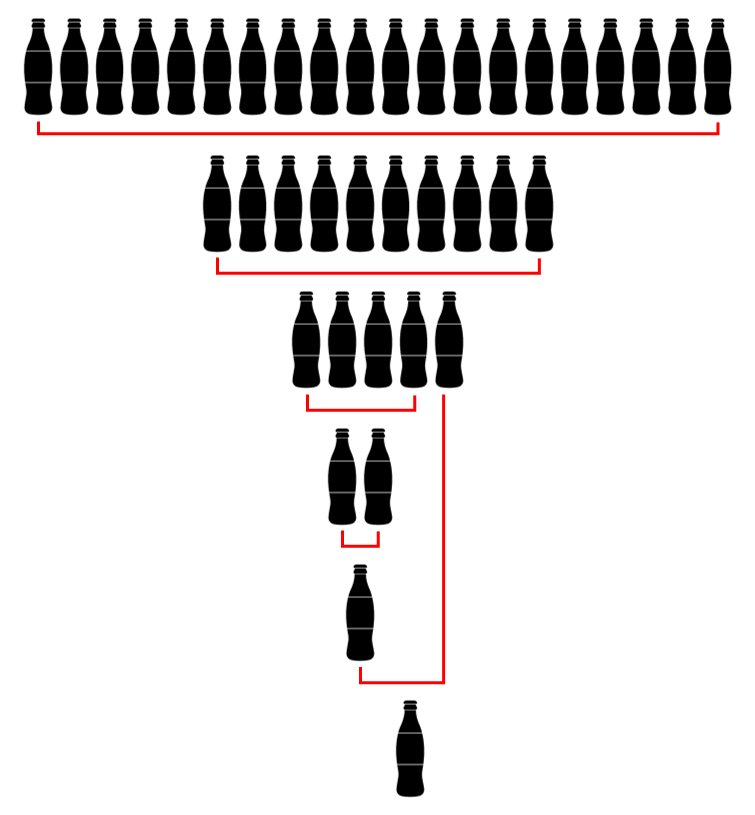<br>
<br>
문제를 열심히 풀던 상빈이는 일반화된 콜라 문제를 생각했습니다. 이 문제는 빈 병 a개를 가져다 주면 콜라 b병을 주는 마트가 있을 때, 빈 병 n개를 가져다 주면 몇 병을 받을 수 있는지 계산하는 문제입니다. 기존 콜라 문제와 마찬가지로, 보유중인 빈 병이 a개 미만이면, 추가적으로 빈 병을 받을 순 없습니다. 상빈이는 열심히 고심했지만, 일반화된 콜라 문제의 정답을 찾을 수 없었습니다. 상빈이를 도와, 일반화된 콜라 문제를 해결하는 프로그램을 만들어 주세요.<br>
<br>
콜라를 받기 위해 마트에 주어야 하는 병 수 a, 빈 병 a개를 가져다 주면 마트가 주는 콜라 병 수 b, 상빈이가 가지고 있는 빈 병의 개수 n이 매개변수로 주어집니다. 상빈이가 받을 수 있는 콜라의 병 수를 return하도록 solution함수를 작성해 주세요.
<br>
* 제한사항
  + 1 ≤ b < a ≤ n ≤ 1,000,000
  + 정답은 항상 int 범위를 넘지 않게 주어집니다.

In [9]:
a = 2
b = 1
n = 20
5 % a

1

In [5]:
def solution(a,b,n):
    answer = 0
    while (n >= a):
        stack = n % a
        n = (n // a) * b
        answer += n
        n += stack
    return answer
solution(a,b,n)

19

In [10]:
def solution2(a,b,n):
    return max(n-b,0)//(a-b)*b
solution2(a,b,n)

19

## 숫자 짝꿍
X와 Y의 짝꿍은 X와 Y에서 공통으로 나타나는 3,0,3으로 만들 수 있는 가장 큰 정수인 330 입니다. 다른 예시로 X = 5525이고 Y = 1255 이면 X 와 Y 의 짝꿍은 X 와 Y 에서 공통을 나타나는 2,5,5로 만들 수 있는 가장 큰 정수인 552입니다.( X 에는 5가 3개, Y 에는 5가 2개 나타나므로 남는 5 한 개는 짝 지을 수 없습니다. )<br>
두 정수 X, Y가 주어졌을 때, X, Y의 짝꿍을 return하는 solution함수를 완성해주세요.
* 제한사항
  + 3 ≤ X, Y의 길이(자릿수) ≤ 3,000,000입니다.
  + X, Y는 0으로 시작하지 않습니다.
  + X, Y의 짝꿍은 상당히 큰 정수일 수 있으므로, 문자열로 반환합니다.

In [28]:
X = '5525'
Y = '1255'
answer = ''
x = list(X)
y = list(Y)
for i in x:
    if i in y:
        y.remove(i)
        answer += i
answer

'552'

In [31]:
## 정확성 73.7 / 100
## 테스트 11 ~ 15 시간초과
def solution(X,Y):
    answer = []
    x = list(X)
    y = list(Y)
    for i in x:
        if i in y:
            y.remove(i)
            answer.append(i)
    if len(answer) == 0:
        return str(-1)
    else:
        return str(int(''.join(sorted(answer,reverse=True))))
solution(X,Y)

'552'

In [32]:
## sorted 함수가 시간초과를 부르는것 같음
## range값을 역순으로 줘서 해결
def solution2(X, Y):
    x = list(X.count(str(x)) for x in range(10))
    y = list(Y.count(str(y)) for y in range(10))
    answer = ""
    for i in range(9, -1, -1):
        answer += str(i) * min(x[i], y[i])

    if answer == "":
        return "-1"
    elif answer[0] == "0" and answer[len(answer) - 1] == "0":
        return "0"
    else:
        return answer
solution2(X,Y)

'552'

## **55. 신고 결과 받기**
신입사원 무지는 게시판 불량 이용자를 신고하고 처리 결과를 메일로 발송하는 시스템을 개발하려 합니다. 무지가 개발하려는 시스템은 다음과 같습니다.
* 각 유저는 한 번에 한 명의 유저를 신고할 수 있습니다.
  + 신고 횟수에 제한은 없습니다. 서로 다른 유저를 계속해서 신고할 수 있습니다.
  + 한 유저를 여러 번 신고할 수도 있지만, 동일한 유저에 대한 신고 횟수는 1회로 처리됩니다.
* k번 이상 신고된 유저는 게시판 이용이 정지되며, 해당 유저를 신고한 모든 유저에게 정지 사실을 메일로 발송합니다.
  + 유저가 신고한 모든 내용을 취합하여 마지막에 한꺼번에 게시판 이용 정지를 시키면서 정지 메일을 발송합니다.
<br>
다음은 전체 유저 목록이 ["muzi", "frodo", "apeach", "neo"]이고, k = 2(즉, 2번 이상 신고당하면 이용 정지)인 경우의 예시입니다.<br>

|유저ID|유저가 신고한 ID|설명|
|:---:|:----------------:|:----:|
|"muzi"|"frodo"|"muzi"가 "frodo"를 신고했습니다.|
|"apeach"|"frodo"|"apeach"가 "frodo"를 신고했습니다.|
|"frodo"|"neo"|"frodo"가 "neo"를 신고했습니다.|
|"muzi"|"neo"|"muzi"가 "neo"를 신고했습니다.|
|"apeach"|"muzi"|"apeach"가 "muzi"를 신고했습니다.|<br><br>


각 유저별로 신고당한 횟수는 다음과 같습니다.<br>

|유저ID|신고당한 횟수|
|:----:|:------------:|
|"muzi"|1|
|"frodo"|2|
|"apeach"|0|
|"neo"|2|<br>

위 예시에서는 2번 이상 신고당한 "frodo"와 "neo"의 게시판 이용이 정지됩니다. 이때, 각 유저별로 신고한 아이디와 정지된 아이디를 정리하면 다음과 같습니다.

|유저 ID|유저가 신고한 ID|정지된 ID|
|:-----:|:--------------:|:-------:|
|"muzi"|["frodo", "neo"]|["frodo", "neo"]|
|"frodo"|["neo"]|["neo"]|
|"apeach"|["muzi", "frodo"]|["frodo"]|
|"neo"|없음|없음|<br>

따라서 "muzi"는 처리 결과 메일을 2회, "frodo"와 "apeach"는 각각 처리 결과 메일을 1회 받게 됩니다.

이용자의 ID가 담긴 문자열 배열 id_list, 각 이용자가 신고한 이용자의 ID 정보가 담긴 문자열 배열 report, 정지 기준이 되는 신고 횟수 k가 매개변수로 주어질 때, 각 유저별로 처리 결과 메일을 받은 횟수를 배열에 담아 return 하도록 solution 함수를 완성해주세요.
* 제한사항
  + 2 ≤ id_list의 길이 ≤ 1,000
    - 1 ≤ id_list의 원소 길이 ≤ 10
    - id_list의 원소는 이용자의 id를 나타내는 문자열이며 알파벳 소문자로만 이루어져 있습니다.
    - id_list에는 같은 아이디가 중복해서 들어있지 않습니다.
  + 1 ≤ report의 길이 ≤ 200,000
    - 3 ≤ report의 원소 길이 ≤ 21
    - report의 원소는 "이용자id 신고한id"형태의 문자열입니다.
    - 예를 들어 "muzi frodo"의 경우 "muzi"가 "frodo"를 신고했다는 의미입니다.
    - id는 알파벳 소문자로만 이루어져 있습니다.
    - 이용자id와 신고한id는 공백(스페이스)하나로 구분되어 있습니다.
    - 자기 자신을 신고하는 경우는 없습니다.
  + 1 ≤ k ≤ 200, k는 자연수입니다.
  + return 하는 배열은 id_list에 담긴 id 순서대로 각 유저가 받은 결과 메일 수를 담으면 됩니다.

In [46]:
id_list = ["muzi", "frodo", "apeach", "neo"]
report = ["muzi frodo","apeach frodo","frodo neo","muzi neo","apeach muzi"]
k = 2

In [66]:
report = set(report) ## 중복제거 / 한 사람이 동일한 사람을 신고했을 때 중복 x
report

{'apeach frodo', 'apeach muzi', 'frodo neo', 'muzi frodo', 'muzi neo'}

In [71]:
answer = [0]*len(id_list) ## id_list의 개수만큼 0 을 채워넣은 리스트 생성
# print(answer)
reported = {i:0 for i in id_list} ## id_list의 원소들을 key로, 0을 value로 / count를 위함
# print(reported)
for i in report:
    a,b = i.split(' ') # 유저와 신고당한 id 분리
    reported[b] += 1 # 신고당한 id 횟수만큼 빈 딕셔너리의 value값에 count
# print(reported)
for i in report:
    a,b = i.split(' ')
    if reported[b] >= k: # 2회이상 신고당하면 이용정지, 유저에게 메일발송
        answer[id_list.index(a)] += 1 # id_list의 인덱스와 일치시켜 count
answer

[2, 1, 1, 0]

In [72]:
## 정답
def solution(id_list, report, k):
    report = set(report)
    answer = [0]*len(id_list)
    reported = {i:0 for i in id_list}
    for i in report:
        a,b = i.split(' ')
        reported[b] += 1
    for i in report:
        a,b = i.split(' ')
        if reported[b] >= k:
            answer[id_list.index(a)] += 1
    return answer
solution(id_list, report, k)

[2, 1, 1, 0]